## Starting Locations of Drifters and Particles 

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


1246


/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hart-davis/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


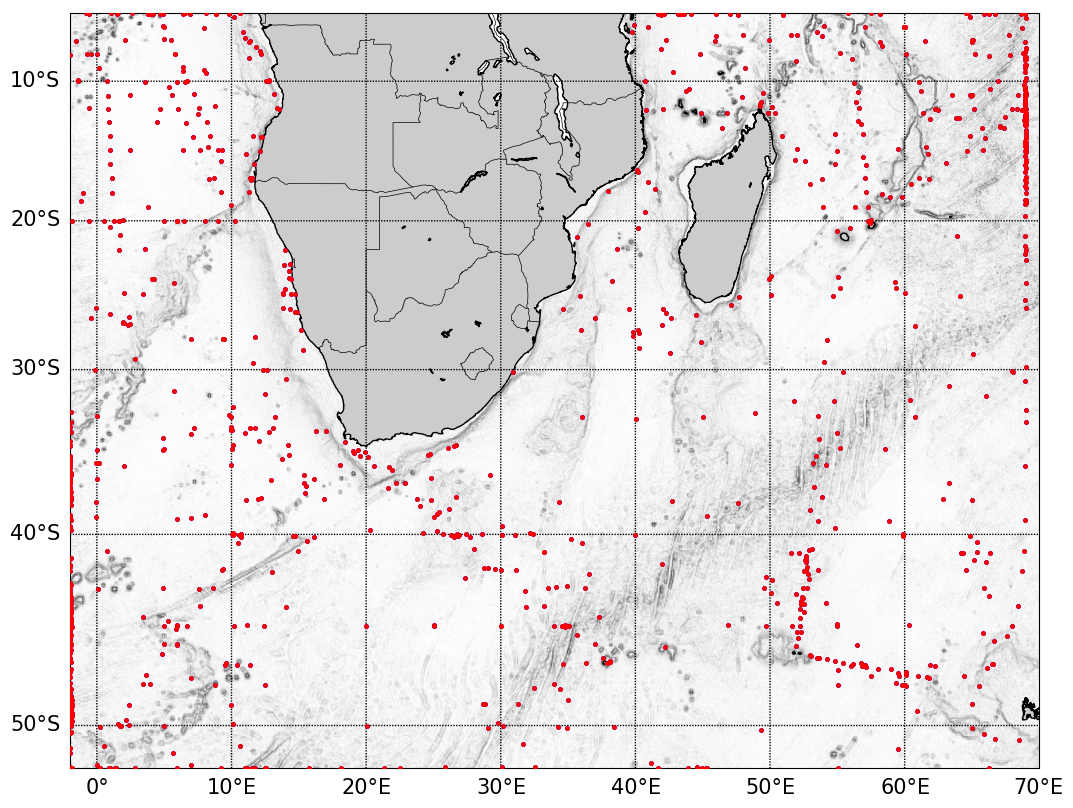

In [1]:
#Starting points of drifters deployed between 1993 - 2015
#Includes Bathymetry Plot

import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0,0]
    lon1 = ts.variables["lon"][0,0]
    date = ts.variables["time"][0]
    d = date - 630720000
    lon.append(lon1)
    lat.append(lat1)


from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure
import pandas
sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

slon = sites.lon[:]
slat = sites.lat[:]

slonn = np.asarray(slon)
slatt = np.asarray(slat)

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=100, facecolor='w', edgecolor='k')


x,y = map(lon,lat)
s,t = map(slonn,slatt)
#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)
globfiles = "/Users/hart-davis/Desktop/Scripts/GEBCO_2014_6x6min_Global.nc"

nc = netCDF4.Dataset(globfiles)

ssh = nc.variables["Height"][:]
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

xx, yy = map(*np.meshgrid(lon,lat))

print len(sites.id)

clevs = np.arange(0,2,0.01)
        
        #-- draw filled contours
#cnplot = map.contourf(x,y,EKE,EKE,cmap=cm.cm.ice)

#cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: distance between map and colorbar
#cbar.set_label('m.s-1')                                      #-- add colorbar title string
cntour = map.contourf(xx,yy,ssh,cmap=cm.cm.gray_r,levels=np.linspace(-6000,0,100),alpha=0.041,zorder=1)

map.scatter(x,y,6,marker="o",color="red",alpha= 1,zorder=3)
map.scatter(s,t,6,marker="o",color="blue",alpha= 1,zorder=2)

#-- add plot title
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.title('Drifter (Red) and Particle (Blue) Starting Locations')
plt.show()